Aayusha Lamichhane
 - Megha Shakya

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.
 

In [ ]:
import pandas as pd
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



# X and y 
y = mushrooms_df['type']  # 'e' or 'p'
X = mushrooms_df.drop(columns='type')

# Separate the data into categorical and ordinal data
ord_features = ['gill_spacing', 'gill_size', 'ring_number', 'population', 'bruises', 'stalk_shape', 'gill_attachment'] # ordinal data
cat_features = [col for col in X.columns if col not in ord_features] # categorical data

# Encoding features
ordEnc = OrdinalEncoder(categories = [['c', 'w', 'd'], ['b', 'n'], ['n', 'o', 't'], ['a', 'c', 'n', 's', 'v', 'y'], ['t', 'f'], ['e', 't'], ['f', 'a']]) # do it
oneHotEnc = OneHotEncoder(sparse_output=False)

# This below section tells Python how to convert each type of feature into numbers before feeding them to your models
ct = ColumnTransformer([('ord', ordEnc, ord_features),
    ('cat', oneHotEnc, cat_features)
], 
                       remainder='passthrough',
                       verbose_feature_names_out=False)

X_trans = ct.fit_transform(X)
X_trans

# Encode output

labEnc = LabelEncoder()
y_trans = labEnc.fit_transform(y) # 'e' -> 0, 'p' -> 1
label_names = labEnc.classes_

# For creating a DataFrame
feature_names = ct.get_feature_names_out()
X_df = pd.DataFrame(data = X_trans, columns = feature_names)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_trans, test_size=0.2, random_state=42)


In [50]:
X_trans.shape

(8124, 105)

In [51]:
# For a logistic regression model

# Scaling the data, since we are using multiple features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Training logistic regression model
model_LogReg = LogisticRegressionCV(penalty = 'l2', max_iter = 10000)
model_LogReg.fit(X_train_scaled, y_train)

# Making predictions
# y_pred_train = model_LogReg.predict(X_train_scaled)
y_pred_log = model_LogReg.predict(X_test_scaled)

y_pred_log_prob = model_LogReg.predict_proba(X_test_scaled)
model_LogReg.C_[0] # best value of C (inverse of regularization strength) that LogisticRegressionCV found during its cross-validation

np.float64(2.782559402207126)

In [52]:
# Decision Tree model

# what is gridsearchCV doing?
# GridSearchCV is a function that searches for the best hyperparameters for a model.

tree_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5)

tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

tree_clf.best_params_


{'max_depth': 10, 'min_samples_split': 2}

In [53]:
# Random Forest using GridSearchCV

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

rf_clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5
)

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_clf.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

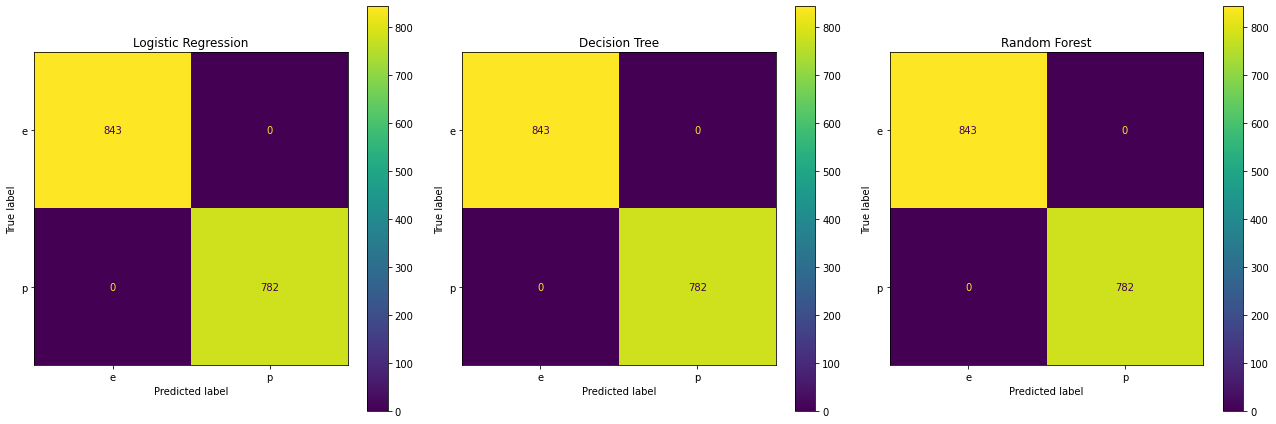

In [54]:
# For Confusion Matrix of all three models

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, display_labels=label_names, ax=ax[0])
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, display_labels=label_names, ax=ax[1])
ax[1].set_title("Decision Tree")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=label_names, ax=ax[2])
ax[2].set_title("Random Forest")

plt.tight_layout()
plt.show()

In [34]:
# Logistic Regression Metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print()

# Decision Tree Metrics
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print()

# Random Forest Metrics
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print()

Logistic Regression Metrics:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0

Decision Tree Metrics:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0

Random Forest Metrics:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0



### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: All models perform really well
- Hyper-parameters: 

Logistic Regression: Using LogisticRegressionCV with an L2 penalty, the best hyper-parameter found was a C value of approximately 2.78 (i.e., C ≈ 2.78).

Decision Tree: The best hyper-parameters found using GridSearchCV were {'max_depth': 10, 'min_samples_split': 2}.

Random Forest: The best hyper-parameters found were {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2}.
- Metrics
    - Accuracy: 1.0
    - Recall: 1.0
    - Precision:1.0
- How did you decide best? 

All three models got perfect scores (1.0) for accuracy, recall, and precision. That means these numbers don't help us pick a winner since they all performed equally well on those metrics.

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [ ]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

for k, col in enumerate(nfl_draft.columns):
    print(f'{k:>3}. {col} - {nfl_draft[col].unique()}')

# see when the players will be drafted (1,2 or 3)

# accuracy is not going to be very high in this one

In [15]:
# For target variable draft_day

def assign_draft_day(round):
    if round == 1:
        return 'Day 1'
    elif round in [2, 3]:
        return 'Day 2'
    elif round in [4, 5, 6, 7]:
        return 'Day 3'

# for new column draft_day
nfl_draft['draft_day'] = nfl_draft['round'].apply(assign_draft_day)

# Removing columns that are not needed
nfl_df = nfl_draft.drop(columns=['Unnamed: 0', 'round', 'name'])

# Selected features
# numeric and categorical features
numeric_features = ['age', 'height', 'weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle', 'season']
categorical_features = ['position', 'college_conference']

# Remove rows with missing values
#nfl_df = nfl_draft.dropna()

# Defining X and y
X = nfl_df[numeric_features + categorical_features]
y = nfl_df['draft_day']

#Encoding target variable
labEnc = LabelEncoder()
y_trans= labEnc.fit_transform(y)
label_names = labEnc.classes_

ct_nfl = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)


# Transform the features
X_trans = ct_nfl.fit_transform(X)

# Split, train and test

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.2, random_state=42)

rf_params = {
    'n_estimators': [80, 100],
    'max_depth': [8,9, 10],
    'min_samples_split': [3, 7]
}

rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Checking the best parameters
print("Best Parameters:", rf_clf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))


Best Parameters: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 100}
Accuracy: 0.5488069414316703
Recall: 0.5488069414316703
Precision: 0.5071095508279644


In [ ]:
nfl_df['cone'].unique()

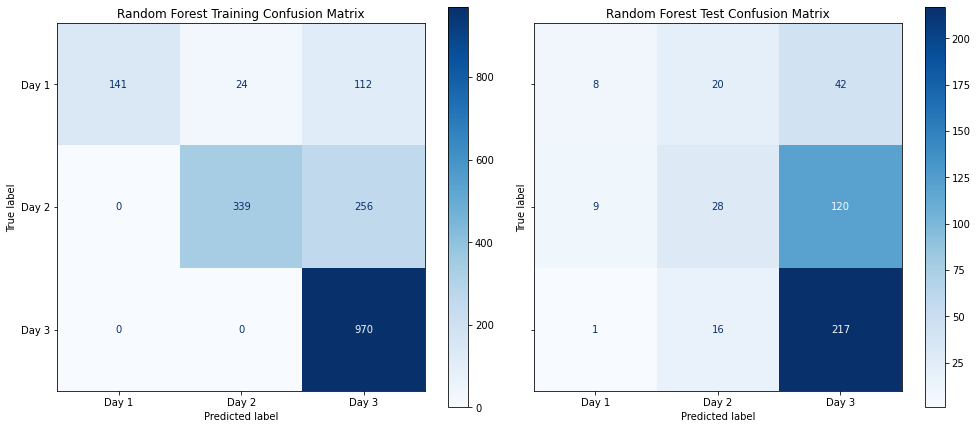

In [22]:
# Compute predictions for training data
y_train_pred = rf_clf.predict(X_train)

# Create subplots: one for training, one for testing
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Training confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=label_names, ax=ax[0], cmap='Blues')
ax[0].set_title("Random Forest Training Confusion Matrix")

# Testing confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_names, ax=ax[1], cmap='Blues')
ax[1].set_title("Random Forest Test Confusion Matrix")

plt.tight_layout()
plt.show()


### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?

I used a Random Forest model because it handles both numeric and categorical data well and can capture complex, non-linear relationships without extensive feature engineering. Random Forests build many decision trees using random subsets of features and training data, which reduces overfitting and increases robustness. Given the complexity of how players' combine performances relate to their draft day, this approach proved more flexible than simpler models like logistic regression. 

 - What was your accuracy?

After tuning with GridSearchCV, the best parameters were a max_depth of 10, min_samples_split of 3, and 100 estimators, achieving around 55% accuracy on the test set.